## 7. Group Assignment & Presentation



__You should be able to start up on this exercise after Lecture 1.__

*This exercise must be a group effort. That means everyone must participate in the assignment.*

In this assignment you will solve a data science problem end-to-end, pretending to be recently hired data scientists in
a company. To help you get started, we've prepared a checklist to guide you through the project. Here are the main steps
that you will go through:

1. Frame the problem and look at the big picture
2. Get the data
3. Explore and visualise the data to gain insights
4. Prepare the data to better expose the underlying data patterns to machine learning algorithms
5. Explore many different models and short-list the best ones
6. Fine-tune your models
7. Present your solution (video presentation) 

In each step we list a set of questions that one should have in mind when undertaking a data science project. The list
is not meant to be exhaustive, but does contain a selection of the most important questions to ask. We will be available
to provide assistance with each of the steps, and will allocate some part of each lesson towards working on the projects.

Your group must submit a _**single**_ Jupyter notebook, structured in terms of the first 6 sections listed above
(the seventh will be a video uploaded to some streaming platform, e.g. YouTube, Vimeo, etc.).


In [1]:
# Importing the necessary libraries for this project
# Standard Library modules
import os
import re
import shutil
import statistics

# Dependencies
import pandas as pd
import numpy as np
import tensorflow as tf
from keras import layers, models
import matplotlib.pyplot as plt
import random as rn

<!-- The following is the assignment description for the followning section, hidden from display
### 1. Analysis: Frame the problem and look at the big picture
1. Find a problem/task that everyone in the group finds interesting
2. Define the objective in business terms
3. How should you frame the problem (supervised/unsupervised etc.)?
4. How should performance be measured?
-->
## 1. Analysis: Frame the problem and look at the big picture
### Problem Statement
Pokemon is the highest grossing media franchise of all time, leading ahead of other very popular franchises such as
Disney's Marvel or Star Wars. The franchise has its roots in a creature-collection RPG video game released back in
1996 for the GameBoy console. Since then, the franchise has expanded to include an animated series with 27 seasons as of
2024, 23 movies, a trading card game spanning decades, a myriad of licensed toys and merchandise, a video-game series
with 41 main games and countless spin-offs, and even a theme park in Japan.

The franchise's main appeal is the fictitious creatures known as Pokemon, which are caught and trained by the people in
the Pokemon world for battles. Each Pokemon has a unique style, ranging from cute to intimidating and everything in
between, they are classified into one or two elemental types and has a set of unique characteristics that sets them
apart.

Telling what a Pokemon is from an image is a task trivial for humans, but as the series has grown from its original 151
roaster of Pokemon to include the current 1025 species as of the latest additions in Pokemon Scarlet and Violet, it has
become a daunting task for anyone to keep track of all the Pokemon species and their types. Additionally, as the series
is sure to keep growing, more and more Pokemon will be added, making it even harder to keep track of them all.

Ideally, this model would be only the tip of the pyramid, additional features could be added to turn this into a more
useful real application such as identifying the pokemon species or even types computer vision models to identify creatures from video footage for this model to classify,
a recommendation system to suggest creatures with an advantage against the identified Pokemon, and much more.

We hope this project will be a fun and interesting learning experience and that it builds a solid foundation.

### Objectives

The following notebook will include every step, from gathering the data for our model to training and evaluating it.
The main objective of this project is to develop a machine learning model capable of classifying images of fictitious
creatures as Pokemon or not.

#### Framing the problem
##### Determine if an image of a creature represents a Pokemon or not.
In the case of the first objective, the problem involves binary classification, where the model's output needs only
to be a yes or no answer to the question "Is this a Pokemon?".

Since we desire a model capable of identifying Pokemon, supervised learning is the most appropriate approach, as we have
clearly labeled data to train the model on. An unsupervised approach would not be appropriate, as allowing the model to
find patterns in the data on its own would be a waste of time at best and produce a model with inaccurate results at worst.

To measure the performance of this model, there are a few metrics to take into account:
  - The model's accuracy defined by how many guesses are actually correct.
  - The model's precision defined as the fraction of the true predictions that are actually true.
  $$ \text{Precision} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Positives}} $$
  - The model's recall defined as the fraction of images correctly identified:
  $$\text{Recall}= \frac {\text{True Positives}}{\text{True Positives + False Negatives}} $$
  - F1 score is also an interesting metric, which is the mean of precision and recall. Since we're dealing with rates,
  the harmonic mean is used instead of the arithmetic mean for most appropriate results:
  $$\text{F1} = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}$$
  - Area Under the Curve (AUC) is also a good metric to take into account, as it measures the area under the ROC curve,
  which is a plot of the true positive rate against the false positive rate.
  - Binary Cross-Entropy, which is the loss function used for  classification problems, is also a good metric to take
  into account, as it measures the difference between the predicted probability distribution and the true distribution.

<!-- The following is the assignment description for the followning section, hidden from display
### 2. Get the data
1. Find and document where you can get the data from
2. Get the data
3. Check the size and type of data (time series, geographical etc)
-->
## 2. Get the data

### Data Sources

To train the model for Pokémon classification, two datasets have been selected
to cover the primary tasks: identifying Pokémon and distinguishing them from
non-Pokémon images. These datasets provide a robust foundation for the project.

- The PokeAPI dataset is an extensive dataset containing all sorts of information
about the Pokemon universe, including information on all Pokemon species, images
and other information such as moves, abilities, and locations. The dataset is
available on GitHub [here](https://github.com/PokeAPI/pokeapi.git) and the
corresponding submodules.

- The Digimon dataset is a collection of images scraped from the
[Wikimon.net](https://wikimon.net/Visual_List_of_Digimon) website and contains
about 1000 images of Digimon species and variations, since this only serves as
negative examples of Pokemon, we only need their images and none of the additional
information about them.

The web scrapper used to gather the Digimon data can be found on GitHub
[here](https://github.com/lorenzo-stacchio/Digimon_Dataset), although there
exists a Google Drive link with the data already gathered, which can be found
[here](https://drive.google.com/drive/folders/1tmcdsoX67NvmAgtmGJgo6kb3N6SlJeLu?usp=share_link)

In order for the rest of the notebook to properly be able to access the dataset, an additional
path.env configuration file is needed, the following is a sample of said file contents:

```properties
pokeAPI-data=path/to/PokeAPI
pokeAPI-sprites=path/to/PokeAPI-sprites
digimon-images=path/to/Digimon

dataset-dir=path/to/generated/dataset
```

Notably, `dataset-dir` is the directory where the generated dataset will be saved. In case that this is not the first
time that you run this notebook, the dataset will be read from this directory instead of being generated again, this is
a measure taken to save time and resources with subsequent runs of the notebook, during development where every session
a new Jupyter server is started and the whole notebook is run again, this is a very useful feature to have.

In [2]:
# This function reads the properties from the path.env file
def read_properties(path):
    props = {}
    property_regex = re.compile(r'#{0}(.+)[:=]([^\n\r#]+)#?')
    with open(path, 'r') as f:
        lines = f.readlines()
        for line in lines:
            match = property_regex.match(line)
            if match:
                key = match.group(1).strip()
                value = match.group(2).strip()
                #print('Found property: {}={}'.format(key, value))
                props[key] = value
    return props

In [3]:
props = read_properties('paths.env')

pokeAPI_data_repo = props['pokeAPI-data']
pokeAPI_sprites_repo = props['pokeAPI-sprites']
digimon_datasource = props['digimon-images']

output_dir = props['dataset-dir']
display(props)

{'pokeAPI-data': '""',
 'pokeAPI-sprites': '""',
 'digimon-images': '""',
 'dataset-dir': './Dataset'}

In [4]:
# Using __ as a prefix to clarify that variables are not meant to be used later
# PokeAPI sprites folder
__pokeAPI_sprites_folder = os.path.join(pokeAPI_sprites_repo, 'sprites')
# Digimon images folder
__digimon_images_folder = os.path.join(digimon_datasource, 'images')

In [5]:
print('Checking for data...')
__pokeAPI_sprites_url = 'https://github.com/PokeAPI/sprites.git'
__digimon_data_url = 'https://drive.google.com/drive/folders/1tmcdsoX67NvmAgtmGJgo6kb3N6SlJeLu?usp=share_link'

__missing_sources = []
if not os.path.exists(__pokeAPI_sprites_folder):
    print('You must download the PokeAPI sprites first from the following git: {}'.format(__pokeAPI_sprites_url))
    __missing_sources.append('PokeAPI sprites')
else:
    print('Retrieving PokeAPI sprites from: {}'.format(__pokeAPI_sprites_folder))

if not os.path.exists(__digimon_images_folder):
    print('You must download the Digimon data first from the following Google Drive: {}'.format(__digimon_data_url))
    __missing_sources.append('Digimon images')
else:
    print('Retrieving Digimon images from: {}'.format(__digimon_images_folder))

if len(__missing_sources) > 1:
    print('You must download the following sources: {}'.format(', '.join(__missing_sources)))
    # TODO: If props['debug'] is False raise the error?, we can then control it from paths.env and rename it .env
    # raise FileNotFoundError('Missing data sources')

if not os.path.exists(output_dir):
    os.makedirs(output_dir)

Checking for data...
You must download the PokeAPI data first from the following git: https://github.com/PokeAPI/pokeapi.git
You must download the PokeAPI sprites first from the following git: https://github.com/PokeAPI/sprites.git
You must download the Digimon data first from the following Google Drive: https://drive.google.com/drive/folders/1tmcdsoX67NvmAgtmGJgo6kb3N6SlJeLu?usp=share_link
You must download the following sources: PokeAPI data, PokeAPI sprites, Digimon images


<!-- The following is the assignment description for the followning section, hidden from display
## 3. Explore the data
1. Create a copy of the data for explorations (sampling it down to a manageable size if necessary)
2. Create a Jupyter notebook to keep a record of your data exploration
3. Study each feature and its characteristics:
    * Name
    * Type (categorical, int/float, bounded/unbounded, text, structured, etc)
    * Percentage of missing values
    * Check for outliers, rounding errors etc
4. For supervised learning tasks, identify the target(s)
5. Visualise the data
6. Study the correlations between features
7. Identify the promising transformations you may want to apply (e.g. convert skewed targets to normal via a log transformation)
8. Document what you have learned
-->
#### Data exploration

- PokeAPI Dataset:
    - The dataset contains images for all Pokemon species, one for each game
    they have been in among many alternate forms and color variations.
- Digimon Dataset
    - The dataset contains images scraped from the Digimon wiki, this includes
    roughly about a thousand images of Digimon species and variations.

In [7]:
# Exploring the available data
def retrieve_relevant_files(path, extension) -> list:
    available_files = []
    files = os.listdir(path)
    for file in files:
        if os.path.isdir(os.path.join(path, file)) and extension != '':
            sub_files = retrieve_relevant_files(os.path.join(path, file), extension)
            for sub_file in sub_files:
                available_files.append(f'{file}/{sub_file}')
        if os.path.isdir(os.path.join(path, file)) and extension == '':
            available_files.append(file)
            sub_dirs = retrieve_relevant_files(os.path.join(path, file), extension)
            for sub_dir in sub_dirs:
                available_files.append(f'{file}/{sub_dir}')
        elif os.path.isfile(os.path.join(path, file)) and extension != '' and file.endswith(extension):
            available_files.append(file)
    return available_files

def find_relevant_sources(path, extension, missing_key):
    if missing_key not in __missing_sources:
        print('-'*20)
        print(f'{missing_key} files:')
        for file in retrieve_relevant_files(path, extension):
            print(file)
    else:
        print(f'{missing_key} files not found, skipping instrospection')

find_relevant_sources(__pokeAPI_sprites_folder, '', 'PokeAPI sprites')
find_relevant_sources(__digimon_images_folder, '', 'Digimon images')

PokeAPI data files not found, skipping instrospection
PokeAPI sprites files not found, skipping instrospection
Digimon images files not found, skipping instrospection


#### The images
As we can see, with the Digimon data it's pretty straightforward, we have a folder with all the images, since these are
only negative examples of non-Pokemon creatures, we don't need to worry about any additional information about them, we
can simply use all of them (despite many being alternate forms, color variations, etc...).

As for the Pokemon images, we have many folders that can be immediately, folders such as badges and items for containing
images that are irrelevant to our task at hand. As for the remaining, the types folder is promising but upon closer
inspection, it contains images of the type labels in a badge, which isn't useful for us, the only folder that contains
the images we need is the `pokemon` folder.

In this folder, we have pictures of Pokemon as well as several subfolders, each containing even more pictures of the
Pokemon. For briefness, we will refer to the [dataset-readme](https://github.com/PokeAPI/sprites/blob/master/README.md)
in order to obtain more information about the images. We can see that the images are named after the Pokemon's ID, and
that they're divided depending on the source game. Most of these contain pixel-art images of the Pokemon, but there is
some promising folders that align with the art-style of our negative set of Digimon images, which makes it so that the
model will have to rely on the features of the Pokemon to classify them, rather than the art-style.

The most promising folders are the `other/official-artwork` which contain artist renditions of every Pokemon and the
`other/dream-world` which contain images of the Pokemon in a more cartoony style from the browser game Pokemon Dream World.
However, our decision is made easy knowing that the `official-artwork` folder contains images of all Pokemon to date while
the `dream-world` folder only contains images of the first 649 Pokemon, which is a subset of the `official-artwork` folder.

This means that we will only be using the `official-artwork` folder for our model, as it contains all the images we need.



In [12]:
# Check if images have already been extracted:
images_dir = os.path.join(output_dir, 'images')
extract_images = {}
pokemon_images_dir = os.path.join(images_dir, 'pokemon')
digimon_images_dir = os.path.join(images_dir, 'digimon')
extract_images['pokemon'] = not os.path.exists(pokemon_images_dir)
extract_images['digimon'] = not os.path.exists(digimon_images_dir)

In [13]:
def extract_pokemon_images():
    source_images = os.path.join(__pokeAPI_sprites_folder, 'pokemon/other/official-artwork')
    poke_image_files = os.listdir(source_images)
    print('Preparing {} Pokemon images...'.format(len(poke_image_files)))
    os.makedirs(pokemon_images_dir)
    # Like the data, images with ID higher than 10000 are not relevant
    valid_image_pattern = re.compile(r'^[0-9]{1,4}\.png')
    for file in poke_image_files:
        if valid_image_pattern.match(file):
            source = os.path.join(source_images, file)
            target = os.path.join(pokemon_images_dir, file)
            shutil.copy(source, target)
            print('Copied {} to {}'.format(file, target))

In [14]:
def extract_digimon_images():
    digimon_image_files = os.listdir(__digimon_images_folder)
    print('Preparing {} Digimon images...'.format(len(digimon_image_files)))
    os.makedirs(digimon_images_dir)
    for file in digimon_image_files:
        source = os.path.join(__digimon_images_folder, file)
        target = os.path.join(digimon_images_dir, file)
        shutil.copy(source, target)
        print('Copied file\n\tfrom: {}\n\tto: {}'.format(file, target))

In [15]:
if extract_images['pokemon']:
    extract_pokemon_images()
else:
    print('Pokemon images already extracted')
if extract_images['digimon']:
    extract_digimon_images()
else:
    print('Digimon images already extracted')

Pokemon images already extracted
Digimon images already extracted


### Dataset Visualization

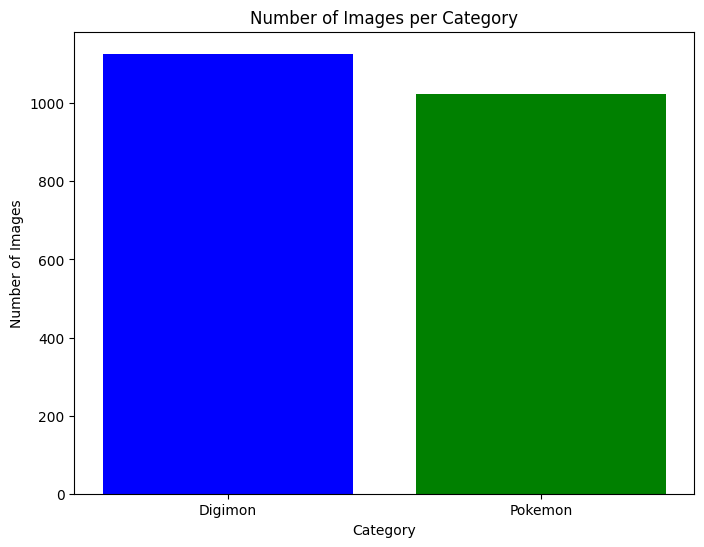

In [52]:
digimon_paths = os.listdir(digimon_images_dir)
pokemon_paths = os.listdir(pokemon_images_dir)

# Calculate the lengths of the paths
digimon_count = len(digimon_paths)
pokemon_count = len(pokemon_paths)

# Create a bar graph
plt.figure(figsize=(8, 6))
plt.bar(['Digimon', 'Pokemon'], [digimon_count, pokemon_count], color=['blue', 'green'])
plt.xlabel('Category')
plt.ylabel('Number of Images')
plt.title('Number of Images per Category')
plt.show()

<!-- The following is the assignment description for the followning section, hidden from display
## 4. Prepare the data
Notes:
* Work on copies of the data (keep the original dataset intact).
* Write functions for all data transformations you apply, for three reasons:
    * So you can easily prepare the data the next time you run your code
    * So you can apply these transformations in future projects
    * To clean and prepare the test set

1. Data cleaning:
    * Fix or remove outliers (or keep them)
    * Fill in missing values (e.g. with zero, mean, median, regression ...) or drop their rows (or columns)
2. Feature selection (optional):
    * Drop the features that provide no useful information for the task (e.g. a customer ID is usually useless for modelling).
3. Feature engineering, where appropriate:
    * Discretize continuous features
    * Use one-hot encoding if/when relevant
    * Add promising transformations of features (e.g. $\log(x)$, $\sqrt{x}$, $x^2$, etc)
    * Aggregate features into promising new features
4. Feature scaling: standardise or normalise features
-->
## 4. Preparation
### Image Processing
From our research, images will need two main transformations:
- The must be resized to a common smaller size, this means both the Pokemon and
Digimon images will have the same size, equalizing our inputs, but also reducing
the computational cost of processing the images.
- The images can be converted to a uniform image format (PNG in our case) for
consistency.

Additional optimizations have been made to the images, such as adding a white
background to the PNG images with transparency, this is to ensure that the
model can't fixate itself on the transparency of the images, as well as to
ensure that the images are all as uniform as possible, removing as much possible
bias as possible from the images.

Moreover, in case of expansion of the project leaning towards pokemon identification, a bigger dataset, including multiple images per pokemon species would be required. This could have been acquired, but rejected for the scope of this project.

In [ ]:
from PIL import Image
import os

# Configuration
final_img_dir = os.path.join(output_dir, 'pre-processed')
# The following tuple defines the final resolution of the images
new_size = (128, 128)

pkm_output = os.path.join(final_img_dir, 'pokemon')
dmn_output = os.path.join(final_img_dir, 'digimon')

# Ensure output folder exists
os.makedirs(final_img_dir, exist_ok=True)
os.makedirs(pkm_output, exist_ok=True)
os.makedirs(dmn_output, exist_ok=True)

def resize_images(input_folder, output_folder, size):
    for filename in os.listdir(input_folder):
        input_path = os.path.join(input_folder, filename)
        output_path = os.path.join(output_folder, filename)
        file_extension = os.path.splitext(filename)[1].lower()
        try:
            with Image.open(input_path) as img:
                img.thumbnail(size)  # Resizes while maintaining aspect ratio
                if file_extension in ['.jpg', '.jpeg']:
                    img = img.convert('RGB')  # Ensure JPEG images are in RGB mode
                    output_path = os.path.splitext(output_path)[0] + '.png'  # Change extension to .png
                    img.save(output_path, 'PNG', icc_profile=None)
                else:
                    img = img.convert('RGBA')
                    # Create a white background
                    background = Image.new('RGBA', img.size, (255, 255, 255, 255))
                    # Composite the image with the white background
                    img = Image.alpha_composite(background, img).convert('RGB')
                    img.save(output_path, 'PNG', icc_profile=None)
                print(f"Resized and saved: {filename}")
        except Exception as e:
            print(f"Failed to process {filename}: {e}")

# Check if output_folder is empty
if not os.listdir(pkm_output) and not os.listdir(dmn_output):
    print(f"The output folder {final_img_dir} is empty. Resizing images.")
    resize_images(pokemon_images_dir, pkm_output, new_size)
    resize_images(digimon_images_dir, dmn_output, new_size)
else:
    print(f"The output folder {final_img_dir} is not empty. Skipping resizing.")

Resized and saved: 348.png
Resized and saved: 412.png
Resized and saved: 374.png
Resized and saved: 360.png
Resized and saved: 406.png
Resized and saved: 638.png
Resized and saved: 176.png
Resized and saved: 88.png
Resized and saved: 610.png
Resized and saved: 604.png
Resized and saved: 162.png
Resized and saved: 189.png
Resized and saved: 837.png
Resized and saved: 77.png
Resized and saved: 823.png
Resized and saved: 63.png
Resized and saved: 980.png
Resized and saved: 758.png
Resized and saved: 994.png
Resized and saved: 764.png
Resized and saved: 770.png
Resized and saved: 943.png
Resized and saved: 957.png
Resized and saved: 228.png
Resized and saved: 566.png
Resized and saved: 200.png
Resized and saved: 214.png
Resized and saved: 572.png
Resized and saved: 599.png
Resized and saved: 1019.png
Resized and saved: 1025.png
Resized and saved: 1024.png
Resized and saved: 1018.png
Resized and saved: 598.png
Resized and saved: 215.png
Resized and saved: 573.png
Resized and saved: 567.png


 <!-- The following is the assignment description for the followning section, hidden from display
## 5. Short-list promising models
We expect you to do some additional research and train at **least one model per team member**.

1. Train mainly quick and dirty models from different categories (e.g. linear, SVM, Random Forests etc) using default parameters
2. Measure and compare their performance
3. Analyse the most significant variables for each algorithm
4. Analyse the types of errors the models make
5. Have a quick round of feature selection and engineering if necessary
6. Have one or two more quick iterations of the five previous steps
7. Short-list the top three to five most promising models, preferring models that make different types of errors
-->
<!-- [//] # TODO: This is where we train two models !!! One for each task OR remove one of the tasks? -->
## 5. Promising models test

Image classification is a well-known problem in the field of machine learning,
and probably one of the most widely used applications of machine learning. As
such, we can deduce that the most commonly used models for image classification
will be the most promising for our task. Support Vector Machines and Neural Networks
are the most commonly used models for image classification, however, SVM
specifically is not well-suited as it is best suited for problems of linear
classification.

Neural Networks are a much more versatile model, and they can be used for a wide
variety of tasks, including image classification. Convolutional Neural Networks
are a type of neural network that is almost synonymous with image classification,
being the most common model used for these kind of tasks, however, for the purpose
of verifying this idea, we will test a simple Feedforward Neural Network and a
Convolutional Neural Network to see which one performs better.

## Final Dataset Preparation
Before we actually, begin working with the data, we need to prepare it in such a
way that the models can easily process them. Keras, a utility within TensorFlow
allows us to quickly preprocess and prepare the data for Neural Network training.

We will ensure images are the right size (although they've already been resized)
and define the other parameters so that we can train several neural networks

In [19]:
# Dataset properties
IMG_SIZE = 128
BATCH_SIZE = 32
BUFFER_SIZE = 2000

In [20]:
# Declare a function to load data
def data_loader(path, subset):
    if subset:
        return tf.keras.preprocessing.image_dataset_from_directory(
            path,
            interpolation='area',
            validation_split=0.2,
            subset=subset,
            shuffle=True,
            seed=123,
            image_size=(IMG_SIZE, IMG_SIZE),
            batch_size=BATCH_SIZE
        )
    else:
        return tf.keras.preprocessing.image_dataset_from_directory(
            path,
            interpolation='area',
            shuffle=True,
            seed=123,
            image_size=(IMG_SIZE, IMG_SIZE),
            batch_size=BATCH_SIZE
        )

In [21]:
# Split the dataset into appropriate portions
train_ds = data_loader(final_img_dir, 'training')

val_ds = data_loader(final_img_dir, 'validation')

test_ds = data_loader(final_img_dir, None)

Found 2152 files belonging to 2 classes.
Using 1722 files for training.
Found 2152 files belonging to 2 classes.
Using 430 files for validation.
Found 2152 files belonging to 2 classes.


### FNN
#### Load the data
We will mainly use Tensorflow and Keras to build our models, as they are the most
widely used and de-facto standard for building neural networks. We will start by
loading the data and then building the model.

In [22]:
# Build Feedforward neural network
fnn_model = models.Sequential([
    layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3)), # 3 channels for RGB
    layers.Rescaling(1./255), # normalize pixel values to [0, 1]
    layers.Flatten(), # flatten the 128x128x3 input images
    layers.Dense(512, activation='relu'), # fully connected layer with 512 units and ReLU activation
    layers.Dropout(0.25), # dropout layer to prevent overfitting, drops 25% of the units
    layers.Dense(256, activation='relu'), # fully connected layer with 256 units and ReLU activation
    layers.Dropout(0.125), # dropout layer to prevent overfitting, drops 12.5% of the units
    layers.Dense(1, activation='sigmoid') # output layer with 1 unit and sigmoid activation for binary classification
], name='FNN_Test')

# compile model
fnn_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='binary_crossentropy',
    metrics=['accuracy', 'Precision', 'Recall', 'AUC'],
    jit_compile=False
)

# inspect model
fnn_model.summary()

Model: "FNN_Test"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 49152)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    25,166,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,297,921 (96.50 MB)

 Trainable params: 25,297,921 (96.50 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
# stop when val_accuracy doesnt improve
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

training = fnn_model.fit(
    train_ds,  # Repeat the dataset
    validation_data=val_ds,
    epochs=25,
    steps_per_epoch=2000 // BATCH_SIZE,
    callbacks=[early_stopping]
)

# evaluate on test set
test_loss, test_acc, test_precision, test_recall, test_auc = fnn_model.evaluate(test_ds)
print(f"\nTest accuracy: {test_acc:.4f}")
print(f"Test precision: {test_precision:.4f}")
print(f"Test recall: {test_recall:.4f}")
print(f"Test F1: {statistics.harmonic_mean([test_precision, test_recall]):.4f}")
print(f"Test AUC: {test_auc:.4f}")
# print(f"Test loss: {test_loss:.4f}")

Epoch 1/25
54/62 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - AUC: 0.4954 - Precision: 0.4803 - Recall: 0.5029 - accuracy: 0.4974 - loss: 2.2914

/Users/hmp/Documents/VIA/6th/MAL/Final Group Project/.venv/lib/python3.12/site-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


62/62 ━━━━━━━━━━━━━━━━━━━━ 7s 104ms/step - AUC: 0.4957 - Precision: 0.4808 - Recall: 0.5017 - accuracy: 0.4985 - loss: 2.2183 - val_AUC: 0.7115 - val_Precision: 0.6508 - val_Recall: 0.4059 - val_accuracy: 0.6186 - val_loss: 0.6409
Epoch 2/25
62/62 ━━━━━━━━━━━━━━━━━━━━ 7s 117ms/step - AUC: 0.5800 - Precision: 0.5557 - Recall: 0.5495 - accuracy: 0.5696 - loss: 0.8712 - val_AUC: 0.6805 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_accuracy: 0.5233 - val_loss: 0.6823
Epoch 3/25
62/62 ━━━━━━━━━━━━━━━━━━━━ 7s 109ms/step - AUC: 0.5565 - Precision: 0.5296 - Recall: 0.5665 - accuracy: 0.5407 - loss: 0.7209 - val_AUC: 0.7153 - val_Precision: 0.4938 - val_Recall: 0.9901 - val_accuracy: 0.5186 - val_loss: 0.6851
Epoch 4/25
62/62 ━━━━━━━━━━━━━━━━━━━━ 7s 109ms/step - AUC: 0.5745 - Precision: 0.5120 - Recall: 0.6226 - accuracy: 0.5403 - loss: 0.6897 - val_AUC: 0.7106 - val_Precision: 0.4833 - val_Recall: 1.0000 - val_accuracy: 0.4977 - val_loss: 0.6888
Epoch 5/25
62/62 ━━━━━━━━━━━━━━━━━━

### CNN
A simple FNN is a good enough start so we can work through adding Convolution
into our Neural Network to see if we can get better results, with this, the new
Neural Network will hopefully perform better, since images have enormous
dimensionality, convolution can help reduce it and thus allow the system to make
more accurate predictions for less computational cost

In [24]:
# Define the CNN model
cnn_model = models.Sequential([
    layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3)),
    layers.Rescaling(1./255),  # Normalize pixel values to [0, 1]

    layers.Conv2D(128, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.BatchNormalization(),# Flatten the image input
    layers.GlobalAveragePooling2D(),

    layers.Dense(256, activation='relu'),  # Fully connected layer
    layers.Dropout(0.25),  # Dropout to prevent overfitting
    layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
], name='CNN_Test')

# Compile the model
cnn_model.compile(
    optimizer=tf.keras.optimizers.AdamW(learning_rate=0.0001),  # Optimizer with default learning rate
    loss='binary_crossentropy',  # Loss function for binary classification
    metrics=['accuracy', 'Precision', 'Recall', 'AUC'],  # Evaluation metrics
    jit_compile=True  # Enable JIT compilation for speedup
)

# Print model summary
cnn_model.summary()

Model: "CNN_Test"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)         │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 128, 128, 128)  │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64, 64, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 37,377 (146.00 KB)

 Trainable params: 37,121 (145.00 KB)

 Non-trainable params: 256 (1.00 KB)

In [26]:
# Train the model
cnn_model_history = cnn_model.fit(
    train_ds,  # Replace with your training dataset
    validation_data=val_ds,  # Replace with your validation dataset
    epochs=10,  # Number of epochs
    batch_size=32  # Batch size
)

# Evaluate the model
test_loss, test_acc, test_precision, test_recall, test_auc = cnn_model.evaluate(test_ds)
print(f"\nTest accuracy: {test_acc:.4f}")
print(f"Test precision: {test_precision:.4f}")
print(f"Test recall: {test_recall:.4f}")
print(f"Test F1: {statistics.harmonic_mean([test_precision, test_recall]):.4f}")
print(f"Test AUC: {test_auc:.4f}")


Epoch 1/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 404s 7s/step - AUC: 0.8260 - Precision: 0.7022 - Recall: 0.8127 - accuracy: 0.7512 - loss: 0.6332 - val_AUC: 0.7909 - val_Precision: 0.4698 - val_Recall: 1.0000 - val_accuracy: 0.4698 - val_loss: 0.6950
Epoch 2/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 395s 7s/step - AUC: 0.8692 - Precision: 0.7496 - Recall: 0.8389 - accuracy: 0.7895 - loss: 0.5363 - val_AUC: 0.8718 - val_Precision: 0.5596 - val_Recall: 1.0000 - val_accuracy: 0.6302 - val_loss: 0.6714
Epoch 3/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 387s 7s/step - AUC: 0.9134 - Precision: 0.7940 - Recall: 0.8804 - accuracy: 0.8321 - loss: 0.4623 - val_AUC: 0.9295 - val_Precision: 0.9262 - val_Recall: 0.6832 - val_accuracy: 0.8256 - val_loss: 0.6476
Epoch 4/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 392s 7s/step - AUC: 0.9419 - Precision: 0.8218 - Recall: 0.9203 - accuracy: 0.8673 - loss: 0.3936 - val_AUC: 0.9547 - val_Precision: 0.9000 - val_Recall: 0.0446 - val_accuracy: 0.5488 - val_loss: 0.6216
Epoch 5/10
54/54 ━━━━━━━━━━━━━━━━━━━

<!-- The following is the assignment description for the followning section, hidden from display
### 6. Fine-tune the system
1. Fine-tune the hyperparameters
2. Once you are confident about your final model, measure its performance on the test set to estimate the generalisation error
<!-- [//] # TODO: Optimizing the chosen models
     [//] # TODO: What is each model predicting and how can we visualize that?
-->
# 6. Fine-tune the system
With the previously acquired knowledge, Convolutional Networks outperform the
simpler Feedforward neural network.

We will also focus on optimizing the parameters so that we obtain the best
results possible

In [28]:
# build CNN model
pokemon_predictor = tf.keras.Sequential([
    layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3)),

    layers.Rescaling(1./255),

    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.BatchNormalization(),

    layers.Conv2D(128, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.BatchNormalization(),

    layers.Conv2D(256, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.BatchNormalization(),

    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
], name='Pokemon_Predictor')

# compile model
pokemon_predictor.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='binary_crossentropy',
    metrics=['accuracy', 'Precision', 'Recall', 'AUC'],
    jit_compile=True
)

# inspect model
pokemon_predictor.summary()

Model: "Pokemon_Predictor"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_2 (Rescaling)         │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 256)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 438,657 (1.67 MB)

 Trainable params: 437,761 (1.67 MB)

 Non-trainable params: 896 (3.50 KB)

In [29]:
# training loop
pokemon_predictor.fit(
    train_ds,
    epochs=25,
    steps_per_epoch=2000 // BATCH_SIZE,
    validation_data=val_ds,
    callbacks=[early_stopping]
)

# evaluate on test set
test_loss, test_acc, test_precision, test_recall, test_auc = pokemon_predictor.evaluate(test_ds)
print(f"\nTest accuracy: {test_acc:.4f}")
print(f"Test precision: {test_precision:.4f}")
print(f"Test recall: {test_recall:.4f}")
print(f"Test F1: {statistics.harmonic_mean([test_precision, test_recall]):.4f}")
print(f"Test AUC: {test_auc:.4f}")

Epoch 1/25
54/62 ━━━━━━━━━━━━━━━━━━━━ 49s 6s/step - AUC: 0.8634 - Precision: 0.7350 - Recall: 0.8779 - accuracy: 0.7863 - loss: 0.4741

/Users/hmp/Documents/VIA/6th/MAL/Final Group Project/.venv/lib/python3.12/site-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


62/62 ━━━━━━━━━━━━━━━━━━━━ 339s 5s/step - AUC: 0.8712 - Precision: 0.7432 - Recall: 0.8834 - accuracy: 0.7947 - loss: 0.4617 - val_AUC: 0.6836 - val_Precision: 0.4698 - val_Recall: 1.0000 - val_accuracy: 0.4698 - val_loss: 0.7945
Epoch 2/25
62/62 ━━━━━━━━━━━━━━━━━━━━ 335s 5s/step - AUC: 0.9659 - Precision: 0.8483 - Recall: 0.9602 - accuracy: 0.9000 - loss: 0.2557 - val_AUC: 0.7653 - val_Precision: 0.4698 - val_Recall: 1.0000 - val_accuracy: 0.4698 - val_loss: 1.0446
Epoch 3/25
62/62 ━━━━━━━━━━━━━━━━━━━━ 330s 5s/step - AUC: 0.9693 - Precision: 0.8728 - Recall: 0.9448 - accuracy: 0.9089 - loss: 0.2331 - val_AUC: 0.8953 - val_Precision: 0.4698 - val_Recall: 1.0000 - val_accuracy: 0.4698 - val_loss: 1.0105
Epoch 4/25
62/62 ━━━━━━━━━━━━━━━━━━━━ 336s 5s/step - AUC: 0.9791 - Precision: 0.9063 - Recall: 0.9744 - accuracy: 0.9393 - loss: 0.1879 - val_AUC: 0.9776 - val_Precision: 0.4698 - val_Recall: 1.0000 - val_accuracy: 0.4698 - val_loss: 0.8898
Epoch 5/25
62/62 ━━━━━━━━━━━━━━━━━━━━ 339s 5s/s

### 7. Present your solution
1. Document what you have done
2. Create a nice 15 minute video presentation with slides
    * Make sure you highlight the big picture first
3. Explain why your solution achieves the business objective
4. Don't forget to present interesting points you noticed along the way:
    * Describe what worked and what did not
    * List your assumptions and you model's limitations
5. Ensure your key findings are communicated through nice visualisations or easy-to-remember statements (e.g. "the median income is the number-one predictor of housing prices")
6. Upload the presentation to some online platform, e.g. YouTube or Vimeo, and supply a link to the video in the notebook.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
Image: ./Dataset/pre-processed/pokemon/424.png


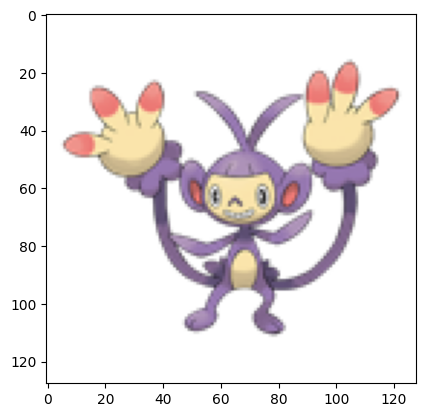

Predicted Classification: Pokémon

Image: ./Dataset/pre-processed/digimon/Tyranomon.png


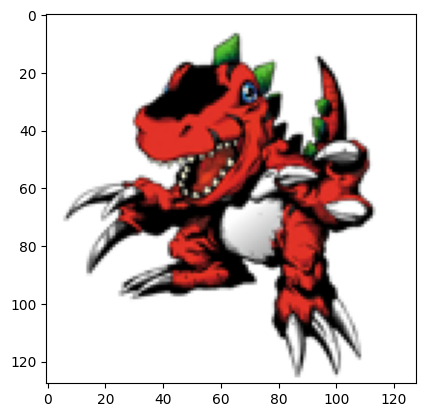

Predicted Classification: Not Pokémon

Image: ./Dataset/pre-processed/pokemon/979.png


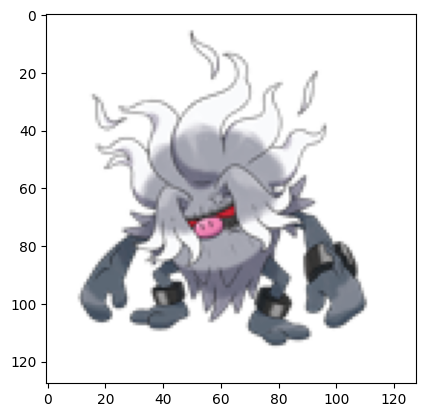

Predicted Classification: Pokémon

Image: ./Dataset/pre-processed/digimon/Neovamdemon.png


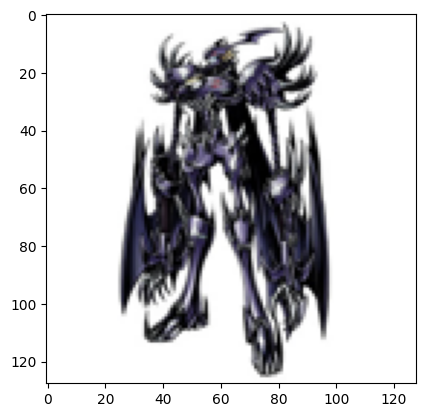

Predicted Classification: Not Pokémon

Image: ./Dataset/pre-processed/pokemon/575.png


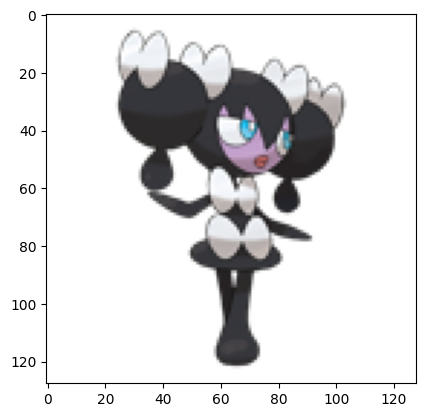

Predicted Classification: Pokémon



In [50]:
# Make an array with all the digimon image paths
# No need to do ir for pokemons, as the names are numbers
digimon_paths = os.listdir(dmn_output) 

# Define a few image paths
image_paths = [
    os.path.join(pkm_output, f'{rn.randint(1, 1025)}.png'),
    os.path.join(dmn_output, digimon_paths[rn.randint(1, digimon_paths.__len__())]),
    os.path.join(pkm_output, f'{rn.randint(1, 1025)}.png'),
    os.path.join(dmn_output, digimon_paths[rn.randint(1, digimon_paths.__len__())]),
    os.path.join(pkm_output, f'{rn.randint(1, 1025)}.png')
]

# Load and preprocess the images
images = []
for img_path in image_paths:
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=(128, 128))  # Adjust target_size as needed
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    images.append(img_array)

images = np.vstack(images)

# Use the trained classifier to predict the class
predictions = pokemon_predictor.predict(images)
predictions = (predictions > 0.5).astype(int)

# Print the image paths with their predicted class
for img_path, prediction in zip(image_paths, predictions):
    classification = "Pokémon" if prediction == 1 else "Not Pokémon"
    print(f"Image: {img_path}")
    plt.imshow(tf.keras.preprocessing.image.load_img(img_path))
    plt.show()
    print(f"Predicted Classification: {classification}\n")

[//] # TODO: Documentation
## Final Documentation

Géron, A. 2017, *Hands-On Machine Learning with Scikit-Learn and Tensorflow*, Appendix B, O'Reilly Media, Inc., Sebastopol.